# US Accidents Exploratory Data Analysis

We're working with a dataset from kaggle called us_accidents.csv

In [1]:
# We'll need to import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./US_Accidents_Dec20_updated.csv')
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


Data cleaning and preparation

In [3]:
# I want to take a look at the columns we have to work with
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Let's see the types of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.select_dtypes(['float','int32','int64']).columns  # Select columns where the data type is in the array
len(df.select_dtypes(['float','int32','int64']).columns)

14

From the data set, there are 14 numeric columns

In [6]:
df.isna().sum()  # This returns the number of null values for each column

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [7]:
number_of_na = df.isna().sum().sort_values(ascending=False)

<AxesSubplot:>

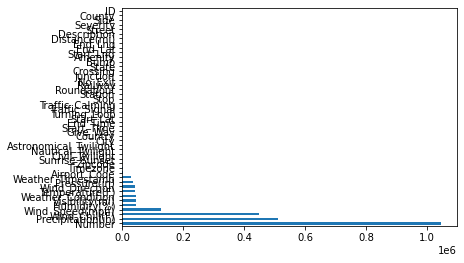

In [8]:
number_of_na.plot(kind='barh')

The plot is a little messy. We could remove the columns that have 0 missing data

<AxesSubplot:>

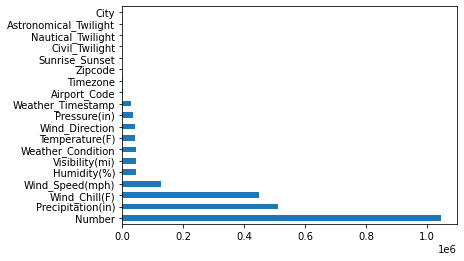

In [9]:
number_of_na[number_of_na > 0].plot(kind='barh')

I'd like to find the percentage of data that is missing relative to the total data entries

In [10]:
np.round((number_of_na / len(df)) * 100)

Number                   69.0
Precipitation(in)        34.0
Wind_Chill(F)            30.0
Wind_Speed(mph)           8.0
Humidity(%)               3.0
Visibility(mi)            3.0
Weather_Condition         3.0
Temperature(F)            3.0
Wind_Direction            3.0
Pressure(in)              2.0
Weather_Timestamp         2.0
Airport_Code              0.0
Timezone                  0.0
Zipcode                   0.0
Sunrise_Sunset            0.0
Civil_Twilight            0.0
Nautical_Twilight         0.0
Astronomical_Twilight     0.0
City                      0.0
Country                   0.0
Give_Way                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Turning_Loop              0.0
Traffic_Signal            0.0
Traffic_Calming           0.0
Stop                      0.0
Station                   0.0
Roundabout                0.0
Railway                   0.0
No_Exit                   0.0
Junction                  0.0
Crossing  

From the result, a significant portion of the number column has a lot of missing data. I beleive we can drop that

In [11]:
df.drop(columns='Number',inplace=True,axis=1)

In [12]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

I want to select the columns that i feel i can extract some information from

<AxesSubplot:>

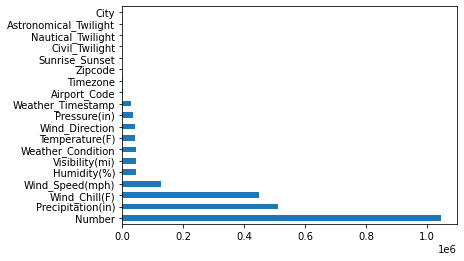

In [13]:
number_of_na[number_of_na > 0].plot(kind='barh')

City,Temperature,Weather_Condition,Visibility,Humidity,Precipitation
Thos are the columns i feel i can use

In [14]:
streamlined_df = df[['Start_Time', 'End_Time','City','State','Country','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Weather_Condition','Visibility(mi)','Humidity(%)','Precipitation(in)',]].copy()

In [15]:
len(streamlined_df.columns)

15

## What city has had the most accident

In [16]:
streamlined_df['City'].nunique()

10657

The are over 10k cities, we could solve this using a group by

In [65]:
streamlined_df['City'].value_counts()

Los Angeles        39984
Miami              36233
Charlotte          22203
Houston            20843
Dallas             19497
                   ...  
Woodsville             1
Southern Pines         1
Imler                  1
East Carondelet        1
Albers                 1
Name: City, Length: 10657, dtype: int64

In [80]:
state_and_city = streamlined_df[['State','City']].values
state_and_city = list(map(lambda x: tuple(x),state_and_city))
state_and_city = set(state_and_city)

In [83]:
state_and_city = pd.DataFrame(state_and_city,columns=['State','City'])

In [66]:
city_acc = streamlined_df['City'].value_counts()

In [85]:
city_acc.head()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

In [64]:
streamlined_df.head()

,Start_Time,End_Time,City,State,Country,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Weather_Condition,Visibility(mi),Humidity(%),Precipitation(in)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,Dublin,OH,US,False,False,False,False,False,False,Light Rain,10.0,58.0,0.00
1,2016-02-08 05:56:20,2016-02-08 11:56:20,Dayton,OH,US,False,False,False,False,False,False,Light Rain,10.0,91.0,0.02
2,2016-02-08 06:15:39,2016-02-08 12:15:39,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
3,2016-02-08 06:15:39,2016-02-08 12:15:39,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
4,2016-02-08 06:51:45,2016-02-08 12:51:45,Akron,OH,US,False,False,False,False,False,False,Overcast,10.0,55.0,NaN


In [93]:
merged = pd.merge(city_acc,state_and_city,left_index=True,right_on='City',).drop(columns=['City_y'],axis=1).reset_index()
merged.rename(columns = {'City_x':'nos accidents'},inplace=True)

In [96]:
merged.drop(columns='index',inplace=True)

In [104]:
merged.loc[(merged.City=='Miami') & (merged.State != 'FL')].index

Int64Index([1, 3], dtype='int64')

In [106]:
merged.drop(merged.loc[(merged.City=='Miami') & (merged.State != 'FL')].index,inplace=True)

In [110]:
merged['City'].value_counts()[merged['City'].value_counts() > 1]

Franklin        20
Clinton         19
Jackson         19
Springfield     19
Greenville      18
                ..
South Boston     2
Paradise         2
Hampstead        2
Hazleton         2
Pine Grove       2
Name: City, Length: 1995, dtype: int64

Whoa, seems like things are more problematic than i thought, about 2k cities have multiple states. We're going to require another dataset

In [123]:
url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'
ext_state_and_city = pd.read_csv(url,delimiter='|')
ext_state_and_city = ext_state_and_city[['State short','City']]
len(ext_state_and_city)

63211

In [124]:
ext_state_and_city = list(map(lambda x: tuple(x),ext_state_and_city.values))
ext_state_and_city = set(ext_state_and_city)
ext_state_and_city = pd.DataFrame(ext_state_and_city,columns=['State short','City'])

In [125]:
ext_state_and_city

,State short,City
0,IA,Atalissa
1,NY,Livonia Center
2,AR,Boles
3,NY,Bay Shore
4,MD,Havre De Grace
...,...,...
29856,SD,Stockholm
29857,NE,Arthur
29858,HI,Wheeler Army Airfield
29859,GA,Canon


In [126]:
merged

,City,nos accidents,State
0,Los Angeles,39984,CA
2,Miami,36233,FL
4,Charlotte,22203,TN
5,Charlotte,22203,MI
6,Charlotte,22203,NC
...,...,...,...
15248,Woodsville,1,NH
15249,Southern Pines,1,NC
15250,Imler,1,PA
15251,East Carondelet,1,IL


In [129]:
final_state_and_city = pd.merge(merged,ext_state_and_city, left_on=['City','State'],right_on=['City','State short']).drop('State short',axis=1)

In [138]:
final_state_and_city.sort_values(by='nos accidents',ascending=False)[:100].groupby(by='State').size().sort_values(ascending=False)

State
OR    7
CA    7
IN    6
IL    6
NC    5
MN    5
FL    4
GA    4
TX    4
MI    4
TN    3
IA    3
KY    3
PA    3
ME    3
AR    3
NY    2
OH    2
NJ    2
MO    2
MS    2
VA    2
CT    2
VT    2
AZ    2
MD    2
UT    1
RI    1
AL    1
OK    1
NV    1
NM    1
LA    1
KS    1
CO    1
WV    1
dtype: int64

From the result above, Los Angeles, Miami, Charlotte, Houston and Dallas has the highest amount of accidents

The datae times where represented in string format, so i'm going to convert the string into date time object

In [18]:
# streamlined_df[['Start_Time', 'End_Time']]
streamlined_df['Start_Time'] = pd.to_datetime(streamlined_df['Start_Time'])

In [19]:
streamlined_df['End_Time'] = pd.to_datetime(streamlined_df['End_Time'])

## Question
1. We could see if population has an impact on the number of accidents
2. What time of the day does most accidents occur


For Los Angeles, what weather did the most accidents occur?

In [20]:
streamlined_df.query("City == 'Los Angeles'")['Weather_Condition'].value_counts()

Fair                     18075
Clear                     7304
Cloudy                    3173
Partly Cloudy             2699
Mostly Cloudy             2166
Haze                      2008
Overcast                  1438
Light Rain                1111
Scattered Clouds           462
Rain                       346
Heavy Rain                 294
Fog                        262
Smoke                      225
Mist                        26
T-Storm                      6
Fair / Windy                 6
Blowing Dust                 5
Light Drizzle                4
Patches of Fog               4
Heavy T-Storm                3
Shallow Fog                  2
Partly Cloudy / Windy        2
Light Rain / Windy           2
Thunderstorm                 1
Thunder                      1
Mostly Cloudy / Windy        1
Name: Weather_Condition, dtype: int64

From the data above, Most accidents occur Calm weathers than in Harsh weathers

I'd like to visulize the trend on a graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

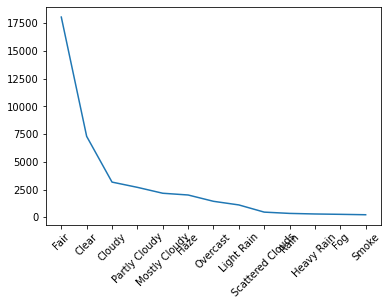

In [21]:
la_acc_weather = streamlined_df.query("City == 'Los Angeles'")['Weather_Condition'].value_counts()
# la_acc_weather.plot(kind='hist')
plt.plot(la_acc_weather[la_acc_weather > 200])
plt.xticks(rotation=45)
# plt.tight_layout()

<AxesSubplot:>

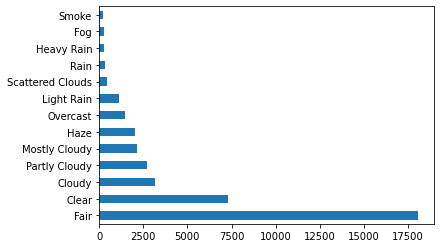

In [22]:
la_acc_weather[la_acc_weather > 100].plot(kind='barh')

The graphs depict the same, the worse the weather, the lower the accidents

Let's see if miami follows the same trend

In [23]:
miami_acc = streamlined_df.query("City == 'Miami'")['Weather_Condition'].value_counts()
miami_acc

Mostly Cloudy                   9474
Fair                            9109
Partly Cloudy                   5667
Cloudy                          3403
Light Rain                      1825
Clear                           1549
Scattered Clouds                1521
Overcast                         642
Rain                             478
Mostly Cloudy / Windy            401
Thunder                          220
Heavy Rain                       198
Fair / Windy                     190
Thunder in the Vicinity          185
Partly Cloudy / Windy            157
T-Storm                          125
Cloudy / Windy                   120
Fog                              104
Thunderstorm                      74
Light Rain / Windy                68
Light Thunderstorms and Rain      61
Light Rain with Thunder           55
Heavy T-Storm                     50
Haze                              32
Heavy Thunderstorms and Rain      32
Heavy Rain / Windy                19
Thunderstorms and Rain            18
R

<AxesSubplot:>

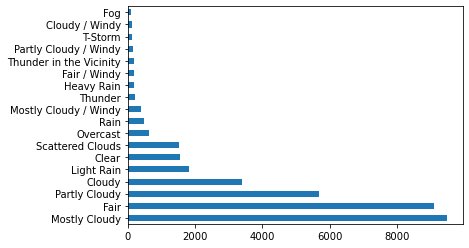

In [24]:
miami_acc = streamlined_df.query("City == 'Miami'")['Weather_Condition'].value_counts()
miami_acc[miami_acc > 100].plot(kind='barh')

A similar trend seems to take place in miami, with this we can conclude that most people as less likely to go out when the wether is bad, than when the weather is clear.

Based on the information above, i'd like to see the relation between accidents and Traffic

In [25]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

From the columns in the data, we don't have the number of traffic, but we do have a traffic_calming column

In [26]:
with pd.option_context('display.max_rows',None):
    display(df.sample(100)) # display is a better alternative to print(), in order to preseve table styles

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1218962,A-3942303,2,2018-12-08 19:16:03,2018-12-08 23:16:03,44.044729,-121.305960,44.041010,-121.306120,0.257,At SW Reed Market Rd/Exit 139 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
592166,A-3313837,2,2020-10-17 00:30:00,2020-10-17 02:31:54,33.726506,-117.834782,33.726739,-117.834671,0.017,Incident on CA-55 NB near EDINGER AVE Drive wi...,...,False,False,False,False,False,False,Night,Night,Night,Night
1206157,A-3929498,2,2019-01-20 10:48:59,2019-01-20 14:48:59,45.546590,-122.537390,45.546590,-122.537390,0.000,At I-84/US-30/Banfield Expy/Exit 10 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
724582,A-3447840,2,2020-05-27 09:14:57,2020-05-27 09:44:57,28.547310,-81.430320,28.547310,-81.430320,0.000,At CR-526/Old Winter Garden Rd - Serious accid...,...,False,False,False,False,True,False,Day,Day,Day,Day
78667,A-2795267,2,2016-08-19 19:26:04,2016-08-20 01:26:04,40.420580,-80.048710,40.421060,-80.043360,0.283,At PA-121/Exit 67 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
172721,A-2889328,4,2017-04-02 09:21:48,2017-04-02 15:21:48,42.385250,-83.157810,42.381030,-83.146910,0.628,Closed at Davison/I-96 Local/Exit 186 - Road c...,...,False,False,False,False,False,False,Day,Day,Day,Day
746924,A-3470187,2,2020-05-01 17:42:32,2020-05-01 18:17:30,35.245460,-80.836360,35.245460,-80.836360,0.000,At Oaklawn Ave - Accident.,...,False,True,False,False,True,False,Day,Day,Day,Day
635738,A-3357948,2,2020-11-15 23:24:00,2020-11-16 01:45:14,43.149745,-77.559801,43.149582,-77.558894,0.047,Incident on BLOSSOM RD near HAMPDEN RD Expect ...,...,False,False,False,False,False,False,Night,Night,Night,Night
1028949,A-3752287,2,2019-12-25 16:54:00,2019-12-25 18:06:26,34.060539,-118.215215,34.060539,-118.215215,0.000,At I-10 - Accident.,...,False,False,False,False,False,False,Night,Day,Day,Day
549031,A-3270078,2,2020-10-12 05:42:54,2020-10-12 10:28:15,39.555251,-76.328309,39.555048,-76.327887,0.026,Incident on MD-543 SB near THOMAS RUN RD Road ...,...,False,False,False,False,False,False,Night,Night,Night,Night


From the table above, we that none of the records have Traffic_Calming set to True, so i checked the percentage

In [27]:
(df.Traffic_Calming.value_counts() / len(df))*100

False    99.967745
True      0.032255
Name: Traffic_Calming, dtype: float64

And from what i see, the Traffic_Calming is False 99% of the time

I couldn't find any information online to validate the results

Which months year had the highest accidents

In [34]:
# streamlined_df.groupby(by = streamlined_df['Start_Time'].dt.year).count()
streamlined_df['Start_Time'].dt.year.value_counts()

2020    787932
2019    261772
2017    170099
2018    166936
2016    129325
Name: Start_Time, dtype: int64

I want to verify how accurate the data is by seeing how many days are in each year

In [43]:
dates = pd.Series(streamlined_df['Start_Time'].dt.date.unique(),dtype='datetime64[ns]')

In [44]:
dates.groupby(by =dates.dt.year).count()

2016    322
2017    365
2018    365
2019    363
2020    319
dtype: int64

<AxesSubplot:>

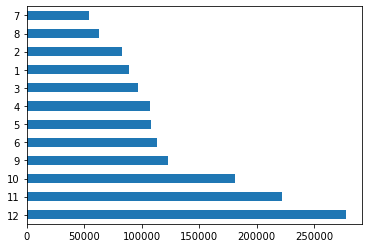

In [51]:
streamlined_df['Start_Time'].dt.month.value_counts().plot(kind='barh')

In [56]:
((streamlined_df.isna().sum()) / len(streamlined_df))*100

Start_Time            0.000000
End_Time              0.000000
City                  0.005475
State                 0.000000
Country               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Weather_Condition     2.902714
Visibility(mi)        2.916170
Humidity(%)           3.001786
Precipitation(in)    33.675953
dtype: float64

## Questions to answer
1. What the is average duration of accidents
2. What is the highest duration of an accident
3. Which state has the higest accident
4. What was the weather condition at most of the accident
5. What time of the day did the accidents occur
6. What are the percentage of occurence of severe accidents
7. Where to accidents occur mostly ('Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway')